In [1]:
import torch
import seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
from kt_base_model import get_kt_batch, KT, KTData
from kt_base_train import Trainer

mpl.rcParams['font.sans-serif'] = ['DengXian']  
mpl.rcParams['axes.unicode_minus'] = False

print('torch.__version__: ', torch.__version__)
print('cuda.__version__: ', torch.version.cuda)
print(torch.cuda.is_available())

torch.__version__:  1.7.0+cu110
cuda.__version__:  11.0
True


In [2]:
n_question = 8
n_pid = 1500
seq_len = 30
n_blocks = 1
d_model = 128
dropout = 0.05
epoch_num = 25
alpha = 2e-4
batch_size = 16 # 64
weight_decay = 2e-4
max_grad_norm = -1

In [3]:
data = KTData(n_question=n_question, seq_len=seq_len)
data.load_data('./exercise_data_a.txt', train_path='./kt_train_data.txt', test_path='./kt_test_data.txt')

In [4]:
train_data = get_kt_batch(data.q_train, data.qa_train, data.p_train, batch_size)
test_data = get_kt_batch(data.q_test, data.qa_test, data.p_test, batch_size)

In [5]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
tra_acc1, tes_acc1 = list(), list()
tra_acc2, tes_acc2 = list(), list()
tra_acc3, tes_acc3 = list(), list()
tra_acc4, tes_acc4 = list(), list()
tra_loss, tes_loss = list(), list()

In [6]:
model = KT(n_question=n_question, n_pid=n_pid, d_model=d_model, n_blocks=n_blocks, dropout=dropout)

In [7]:
trainer = Trainer(model=model, train_data=train_data, epoch_num=epoch_num, alpha=alpha, 
                  batch_size=batch_size, weight_decay=weight_decay, max_grad_norm=max_grad_norm)
epoch = 0

d:\pycharmprojects\ecnu-eduktm\venv\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [8]:
for epoch in range(epoch_num):
    loss_tot = 0
    loss_tot += trainer.train_func()

    train_loss, train_acc1, train_acc2, train_acc3, train_acc4 = trainer.model_eval(train_data)
    test_loss, test_acc1, test_acc2, test_acc3, test_acc4 = trainer.model_eval(test_data)

    tra_loss.append(train_loss / len(train_data) / batch_size)
    tes_loss.append(test_loss / len(test_data) / batch_size)
    tra_acc1.append(train_acc1)
    tes_acc1.append(test_acc1)
    tra_acc2.append(train_acc2)
    tes_acc2.append(test_acc2)
    tra_acc3.append(train_acc3)
    tes_acc3.append(test_acc3)
    tra_acc4.append(train_acc4)
    tes_acc4.append(test_acc4)
    print("---------- iteration", epoch + 1, "----------")
    print("total loss:", loss_tot)
    print("train loss: %.6f, test loss: %.6f" % (train_loss / len(train_data), test_loss / len(test_data)))
    print("train acc: %.6f, every acc: %.6f, right acc: %.6f, wrong acc: %.6f" % (train_acc1, train_acc2, train_acc3, train_acc4))
    print("test acc: %.6f, every acc: %.6f, right acc: %.6f, wrong acc: %.6f" % (test_acc1, test_acc2, test_acc3, test_acc4))

D:\PyCharmProjects\ecnu-EduKTM\test12a\kt_base_train.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  acc = torch.mean(torch.tensor(pred == y, dtype=torch.float))


---------- iteration 1 ----------
total loss: tensor([34186.8125], device='cuda:0')
train loss: 437.563112, test loss: 454.815094
train acc: 0.951368, every acc: 0.341480, right acc: 0.958719, wrong acc: 0.895916
test acc: 0.950547, every acc: 0.334652, right acc: 0.958759, wrong acc: 0.890805
---------- iteration 2 ----------
total loss: tensor([6991.0654], device='cuda:0')
train loss: 263.760104, test loss: 274.927780
train acc: 0.962503, every acc: 0.420042, right acc: 0.966121, wrong acc: 0.922147
test acc: 0.961570, every acc: 0.402690, right acc: 0.966562, wrong acc: 0.917616
---------- iteration 3 ----------
total loss: tensor([5297.3472], device='cuda:0')
train loss: 257.527144, test loss: 270.499586
train acc: 0.969322, every acc: 0.484637, right acc: 0.974491, wrong acc: 0.932700
test acc: 0.967518, every acc: 0.466772, right acc: 0.973393, wrong acc: 0.930365
---------- iteration 4 ----------
total loss: tensor([4649.8013], device='cuda:0')
train loss: 370.920687, test loss:

In [9]:
epoch += 1 

trainer.model_save(epoch, './results/kt_base_model.pth')

In [10]:
trainer.model_valid('./exercise_data_b.txt', './results/kt_base_valid.txt')

In [11]:
print('train_kt_acc_single:', tra_acc1[-1], ', train_kt_acc_every:', tra_acc2[-1])
print('train_kt_acc_right:', tra_acc3[-1], ', train_kt_acc_wrong:', tra_acc4[-1])
print('test_kt_acc_single:', tes_acc1[-1], ', test_kt_acc_every:', tes_acc2[-1])
print('test_kt_acc_right:', tes_acc3[-1], ', test_kt_acc_wrong:', tes_acc4[-1])

train_kt_acc_single: 0.989743709564209 , train_kt_acc_every: 0.7706005573272705
train_kt_acc_right: 0.9874870181083679 , train_kt_acc_wrong: 0.9844754338264465
test_kt_acc_single: 0.9840424656867981 , test_kt_acc_every: 0.6716772317886353
test_kt_acc_right: 0.9800505638122559 , test_kt_acc_wrong: 0.9775320887565613


In [12]:
file = open("./results/kt_base_desc.txt",'w') 
print('train_kt_acc_single:', tra_acc1[-1], ', train_kt_acc_every:', tra_acc2[-1], file=file)
print('train_kt_acc_right:', tra_acc3[-1], ', train_kt_acc_wrong:', tra_acc4[-1], file=file)
print('test_kt_acc_single:', tes_acc1[-1], ', test_kt_acc_every:', tes_acc2[-1], file=file)
print('test_kt_acc_right:', tes_acc3[-1], ', test_kt_acc_wrong:', tes_acc4[-1], file=file)
print('', file=file)
print('train_kt_acc_single:', tra_acc1, file=file)
print('train_kt_acc_every:', tra_acc2, file=file)
print('train_kt_acc_right:', tra_acc3, file=file)
print('train_kt_acc_wrong:', tra_acc4, file=file)
print('test_kt_acc_single:', tes_acc1, file=file)
print('test_kt_acc_every:', tes_acc2, file=file)
print('test_kt_acc_right:', tes_acc3, file=file)
print('test_kt_acc_wrong:', tes_acc4, file=file)
file.close()

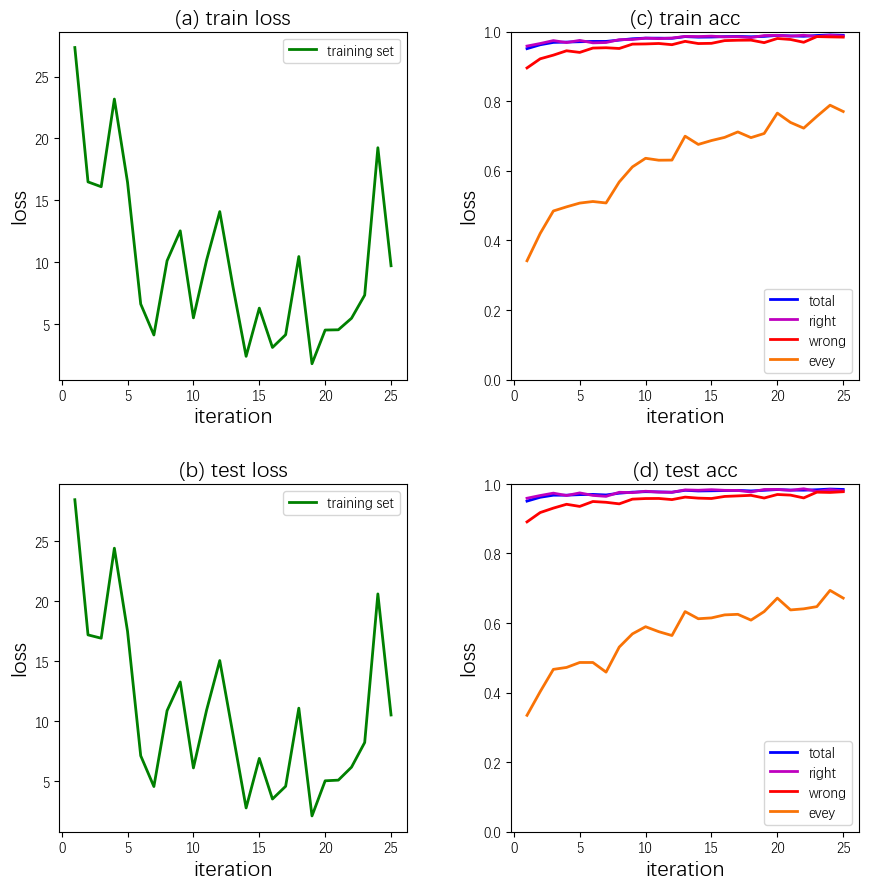

In [13]:
x_range = list(range(1, epoch + 1))
fig = plt.figure(num=1, figsize=(10, 10), dpi=100, clear=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, hspace=0.3, wspace=0.3)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

l1, = ax1.plot(x_range, tra_loss, c='g', lw='2')
ax1.set_title('(a) train loss', fontsize=16)
ax1.set_xlabel('iteration', fontsize=16)
ax1.set_ylabel('loss', fontsize=16)
ax1.legend([l1], ['training set'], fontsize=10)  

l1, = ax3.plot(x_range, tes_loss, c='g', lw='2')
ax3.set_title('(b) test loss', fontsize=16)
ax3.set_xlabel('iteration', fontsize=16)
ax3.set_ylabel('loss', fontsize=16)
ax3.legend([l1], ['testing set'], fontsize=10)  

l1, = ax2.plot(x_range, tra_acc1, c=seaborn.xkcd_rgb['orange'], lw='2')
l2, = ax2.plot(x_range, tra_acc3, c='r', lw='2')
l3, = ax2.plot(x_range, tra_acc4, c='m', lw='2')
l4, = ax2.plot(x_range, tra_acc2, c='b', lw='2')
ax2.set_title('(c) train accuracy', fontsize=16)
ax2.set_xlabel('iteration', fontsize=16)
ax2.set_ylabel('loss', fontsize=16)
ax2.set_ylim((0, 1))
ax2.legend([l1, l2, l3, l4], ['total', 'right', 'wrong', 'evey'], loc='lower right', fontsize=10)  

l1, = ax4.plot(x_range, tes_acc1, c=seaborn.xkcd_rgb['orange'], lw='2')
l2, = ax4.plot(x_range, tes_acc3, c='r', lw='2')
l3, = ax4.plot(x_range, tes_acc4, c='m', lw='2')
l4, = ax4.plot(x_range, tes_acc2, c='b', lw='2')
ax4.set_title('(d) test accuracy', fontsize=16)
ax4.set_xlabel('iteration', fontsize=16)
ax4.set_ylabel('loss', fontsize=16)
ax4.set_ylim((0, 1))
ax4.legend([l1, l2, l3, l4], ['total', 'right', 'wrong', 'evey'], loc='lower right', fontsize=10)  

plt.savefig('./results/kt_base_total.jpg')